# UBER DRIVERS DATA ANALYSIS CASE STUDY

-------

<b>Importing Libraries</b>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

<b>Data Collection</b>

In [2]:
files = os.listdir(r"C:\Users\hp\Desktop\Datasets\Uber Data")
files

['uber-raw-data-apr14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv']

In [3]:
path = r"C:\Users\hp\Desktop\Datasets\Uber Data"
final = pd.DataFrame()
for file in files:
    df = pd.read_csv(path+"/"+file, encoding="utf-8")
    final = pd.concat([final,df])

In [4]:
final.shape

(4534327, 4)

In [5]:
final.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


<b>Data Preparation<b>

In [6]:
df = final.copy()
df.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [7]:
df["Date/Time"] = pd.to_datetime(df["Date/Time"], format= "%m/%d/%Y %H:%M:%S")

In [8]:
df.dtypes

Date/Time    datetime64[ns]
Lat                 float64
Lon                 float64
Base                 object
dtype: object

In [9]:
df.head()

,Date/Time,Lat,Lon,Base
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512


In [10]:
df["Weekday"] = df["Date/Time"].dt.day_name()

In [11]:
df["Day"] = df["Date/Time"].dt.day

In [12]:
df["Minute"] = df["Date/Time"].dt.minute

In [13]:
df["Month"] = df["Date/Time"].dt.month

In [14]:
df["Hour"] = df["Date/Time"].dt.hour

In [15]:
df.head()

,Date/Time,Lat,Lon,Base,Weekday,Day,Minute,Month,Hour
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,Tuesday,1,11,4,0
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,Tuesday,1,17,4,0
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,Tuesday,1,21,4,0
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,Tuesday,1,28,4,0
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,Tuesday,1,33,4,0


In [16]:
df.dtypes

Date/Time    datetime64[ns]
Lat                 float64
Lon                 float64
Base                 object
Weekday              object
Day                   int64
Minute                int64
Month                 int64
Hour                  int64
dtype: object

<b>Analyzing Trips Of Uber</b>

In [17]:
# By Week Days
df["Weekday"].value_counts()

Thursday     755145
Friday       741139
Wednesday    696488
Tuesday      663789
Saturday     646114
Monday       541472
Sunday       490180
Name: Weekday, dtype: int64

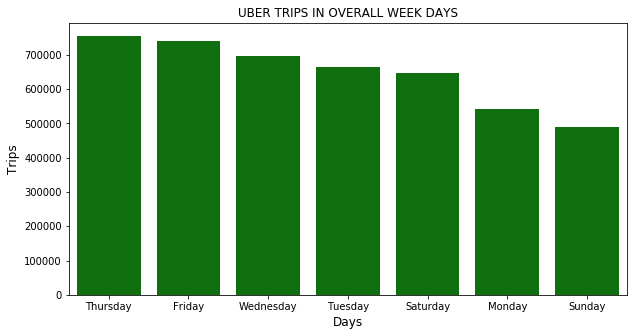

In [18]:
plt.figure(figsize=(10,5))
plt.title("UBER TRIPS IN OVERALL WEEK DAYS")
sns.barplot(x=df["Weekday"].value_counts().index, 
           y=df["Weekday"].value_counts(), color="g")
plt.xlabel("Days",fontsize=12)
plt.ylabel("Trips", fontsize=12)
plt.show()

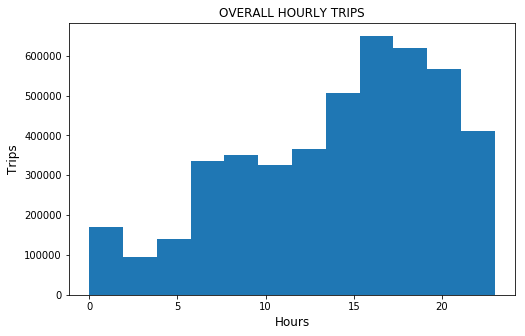

In [19]:
# By Hours

plt.figure(figsize=(8,5))
plt.hist(df["Hour"], bins=12)
plt.title("OVERALL HOURLY TRIPS")
plt.xlabel("Hours",fontsize=12)
plt.ylabel("Trips", fontsize=12)
plt.show()

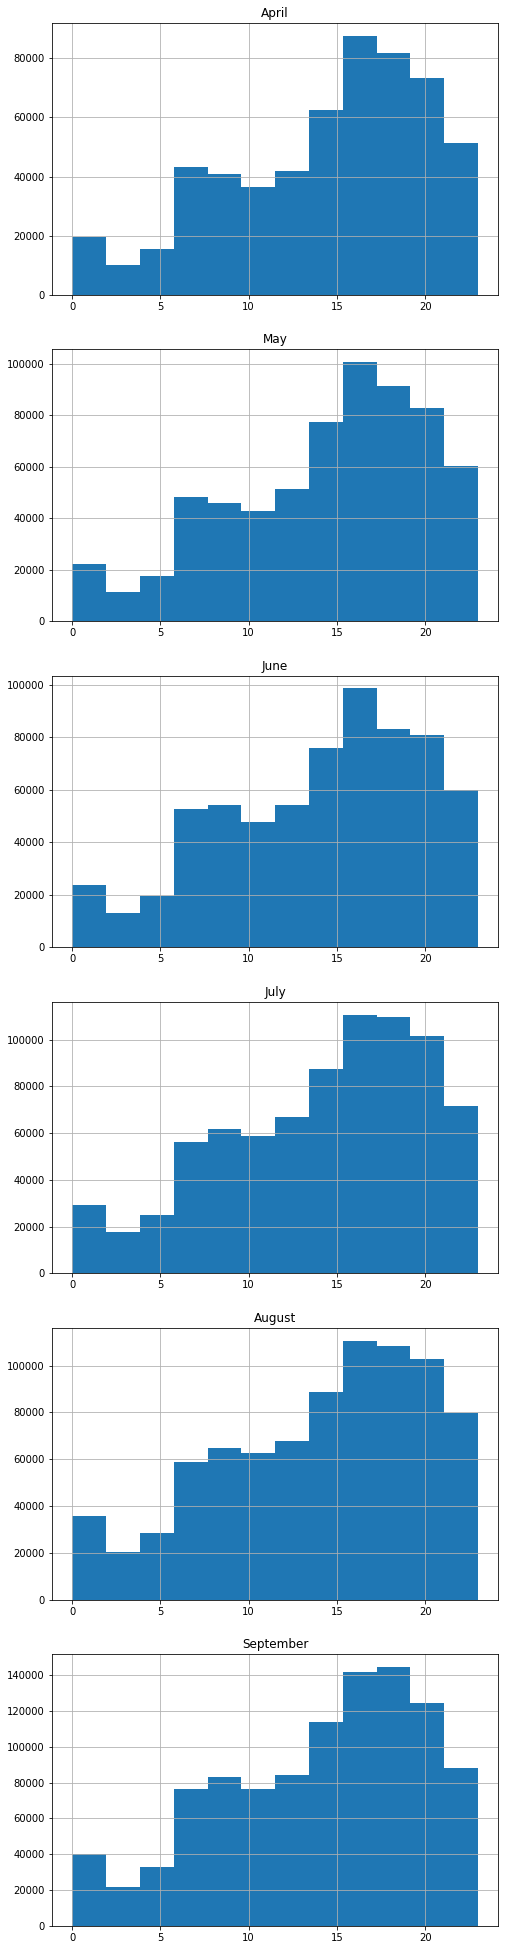

In [20]:
# By Hours In Each Month

sorted_month = np.sort(df["Month"].unique())

plt.figure(figsize=(8,35))

for i,month in enumerate(sorted_month):
    plt.subplot(6,1,i+1)
    df[df["Month"]==month]["Hour"].hist(bins=12)
    if month==4:
        plt.title("April")
    if month==5:
        plt.title("May")
    if month==6:
        plt.title("June")
    if month==7:
        plt.title("July")
    if month==8:
        plt.title("August")
    if month==9:
        plt.title("September")

<b>Analyzing Monthly Rides</b>

In [21]:
# Each Month Count

df["Month"].value_counts()

9    1028136
8     829275
7     796121
6     663844
5     652435
4     564516
Name: Month, dtype: int64

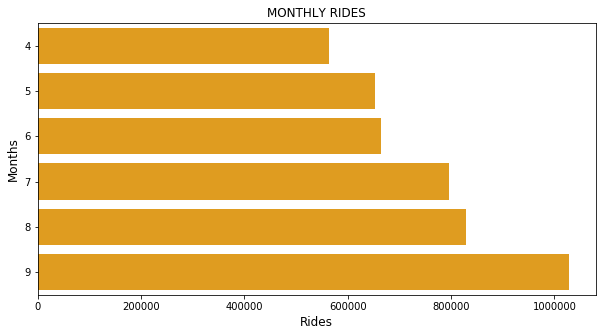

In [22]:
plt.figure(figsize=(10,5))
plt.title("MONTHLY RIDES")
sns.barplot(x=df["Month"].value_counts(), 
           y=df["Month"].value_counts().index, 
            color="orange", 
            orient="h")
plt.xlabel("Rides",fontsize=12)
plt.ylabel("Months", fontsize=12)
plt.show()

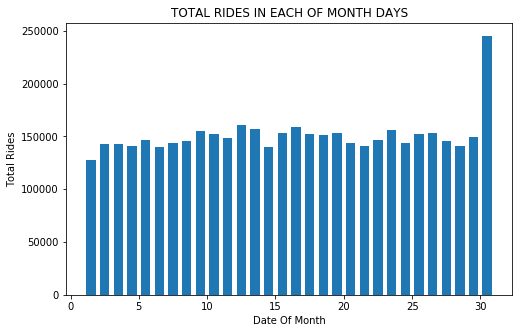

In [23]:
# Overall Day Rides

plt.figure(figsize=(8,5))
plt.hist(df["Day"], bins=30, rwidth=0.7)
plt.xlabel("Date Of Month")
plt.ylabel("Total Rides")
plt.title("TOTAL RIDES IN EACH OF MONTH DAYS")
plt.show()

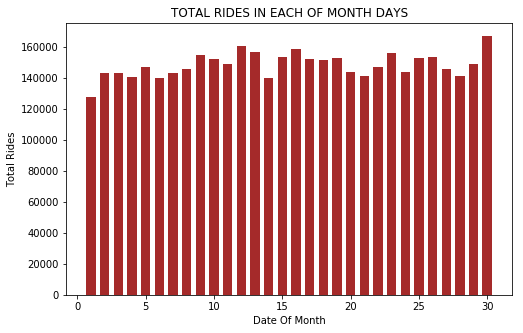

In [24]:
# Overall Day Rides (After Editing Class Boundaries / Range / Relative Frequency)

plt.figure(figsize=(8,5))
plt.hist(df["Day"], bins=30, rwidth=0.7, range=(0.5,30.5), color="brown")
plt.xlabel("Date Of Month")
plt.ylabel("Total Rides")
plt.title("TOTAL RIDES IN EACH OF MONTH DAYS")
plt.show()

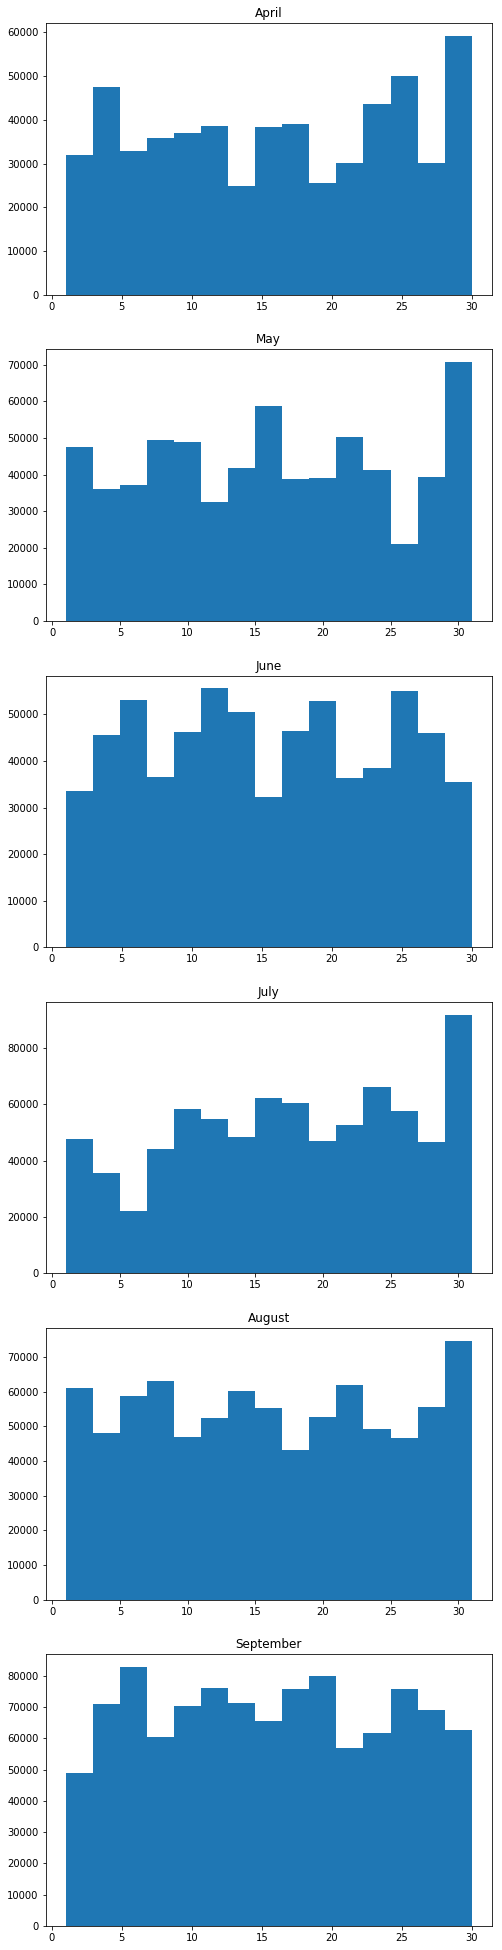

In [25]:
# Total Rides In Each Day (Month-Wise)


#sorted_month = np.sort(df["Month"].unique())

plt.figure(figsize=(8,35))

for i,month in enumerate(sorted_month,1):
    plt.subplot(6,1,i)
    df_out = df[df["Month"]==month]
    plt.hist(df_out["Day"], bins=15)

    if month==4:
        plt.title("April")
    if month==5:
        plt.title("May")
    if month==6:
        plt.title("June")
    if month==7:
        plt.title("July")
    if month==8:
        plt.title("August")
    if month==9:
        plt.title("September")

<b>Analyzing Rush Latitudes</b>

C:\Users\hp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


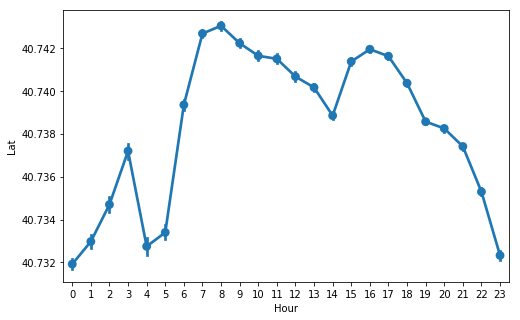

In [26]:
# Total Rush Latitude vs Hours

plt.figure(figsize=(8,5))
sns.pointplot(x="Hour", y="Lat", data=df)

C:\Users\hp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


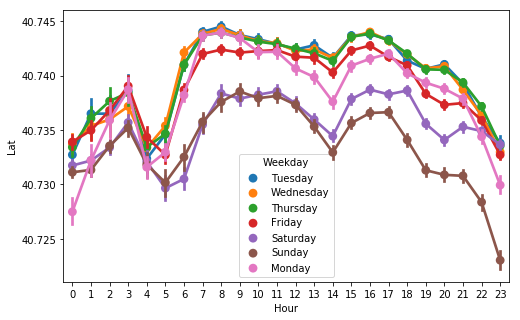

In [27]:
# Rush Latitude vs Hours Per Each Week Day

plt.figure(figsize=(8,5))
sns.pointplot(x="Hour", y="Lat", data=df, hue="Weekday")
plt.show()

<b>Cross Analysis</b>

In [28]:
# Popularity Of Base Numbers w.r.t Months

base_df = df.groupby(["Base","Month"])["Date/Time"].count().reset_index()
base_df.columns = ["Base","Month","Counts"]
base_df

,Base,Month,Counts
0,B02512,4,35536
1,B02512,5,36765
2,B02512,6,32509
3,B02512,7,35021
4,B02512,8,31472
5,B02512,9,34370
6,B02598,4,183263
7,B02598,5,260549
8,B02598,6,242975
9,B02598,7,245597


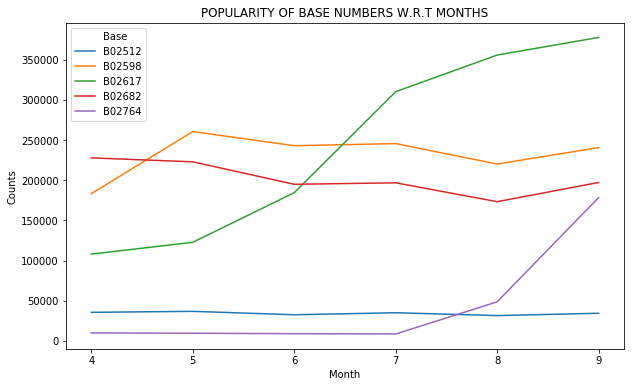

In [29]:
plt.figure(figsize=(10,6))
sns.lineplot(x="Month", y="Counts", hue="Base", data=base_df)
plt.title("POPULARITY OF BASE NUMBERS W.R.T MONTHS")
plt.show()

<b></b>

In [30]:
def count_rows(rows):
    return len(rows)

In [31]:
by_cross = df.groupby(["Weekday","Hour"]).apply(count_rows)
by_cross

Weekday    Hour
Friday     0       13716
           1        8163
           2        5350
           3        6930
           4        8806
           5       13450
           6       23412
           7       32061
           8       31509
           9       25230
           10      24176
           11      25188
           12      25907
           13      30341
           14      36206
           15      43673
           16      48169
           17      51961
           18      54762
           19      49595
           20      43542
           21      48323
           22      49409
           23      41260
Monday     0        6436
           1        3737
           2        2938
           3        6232
           4        9640
           5       15032
                   ...  
Tuesday    18      50186
           19      44789
           20      44661
           21      39913
           22      27712
           23      14869
Wednesday  0        7644
           1        4324
         

In [32]:
pivot = by_cross.unstack()
pivot

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Weekday,,,,,,,,,,,,,,,,,,,,,
Friday,13716,8163,5350,6930,8806,13450,23412,32061,31509,25230,...,36206,43673,48169,51961,54762,49595,43542,48323,49409,41260
Monday,6436,3737,2938,6232,9640,15032,23746,31159,29265,22197,...,28157,32744,38770,42023,37000,34159,32849,28925,20158,11811
Saturday,27633,19189,12710,9542,6846,7084,8579,11014,14411,17669,...,31418,38769,43512,42844,45883,41098,38714,43826,47951,43174
Sunday,32877,23015,15436,10597,6374,6169,6596,8728,12128,16401,...,28151,31112,33038,31521,28291,25948,25076,23967,19566,12166
Thursday,9293,5290,3719,5637,8505,14169,27065,37038,35431,27812,...,36699,44442,50560,56704,55825,51907,51990,51953,44194,27764
Tuesday,6237,3509,2571,4494,7548,14241,26872,36599,33934,25023,...,34846,41338,48667,55500,50186,44789,44661,39913,27712,14869
Wednesday,7644,4324,3141,4855,7511,13794,26943,36495,33826,25635,...,35148,43388,50684,55637,52732,47017,47772,44553,32868,18146


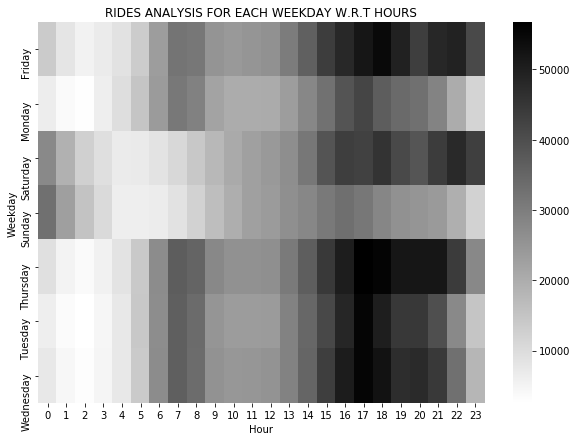

In [38]:
# RIDES IN HOURS W.R.T WEEKDAYS

plt.figure(figsize=(10,7))
sns.heatmap(pivot, cmap="binary")
plt.title("RIDES IN HOURS W.R.T WEEKDAYS")
plt.show()

In [42]:
def cross_analysis(col1,col2):
    by_cross = df.groupby([col1,col2]).apply(count_rows)
    pivot = by_cross.unstack()
    plt.figure(figsize=(10,7))
    sns.heatmap(pivot, cmap="binary")
    plt.show()

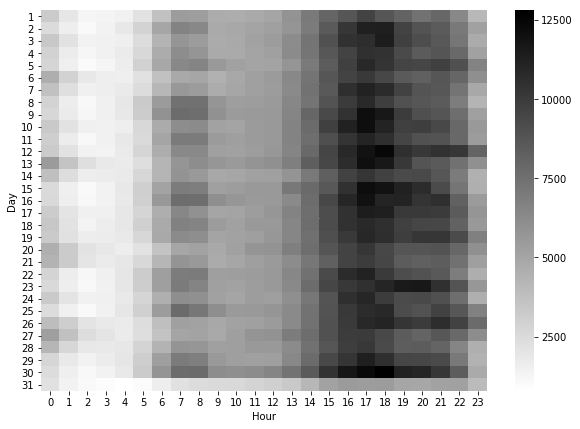

In [43]:
# RIDES IN HOURS W.R.T MONTH DAYS
cross_analysis("Day","Hour")

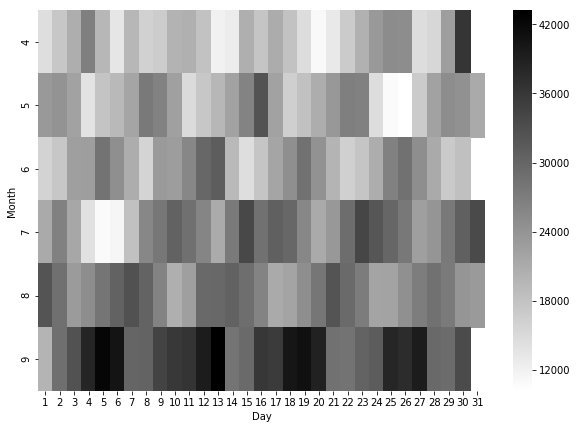

In [45]:
# RIDES IN MONTHDAYS W.R.T MONTHS

cross_analysis("Month","Day")

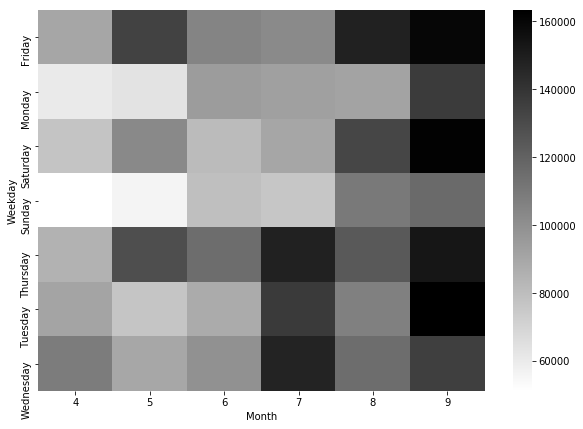

In [48]:
# RIDES IN MONTHS W.R.T WEEK DAYS

cross_analysis("Weekday","Month")

<b>Spatial Analysis On Demand Of Uber</b>


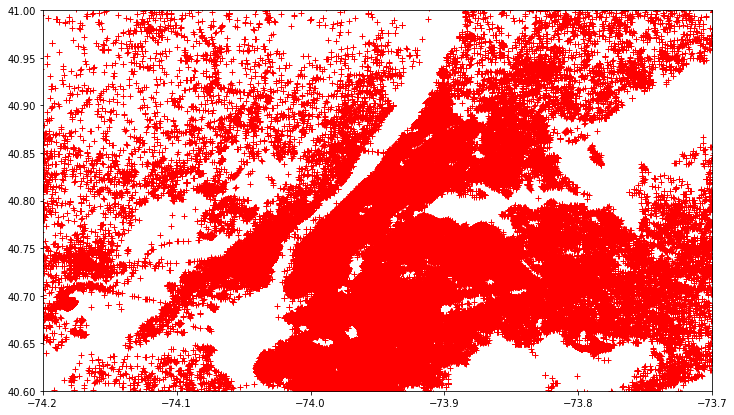

In [59]:
# For Spatial Anlaysis we shall consider df.Lat and df.Lon features
# Visualising Location Data Points 

plt.figure(figsize=(12,7))
plt.plot(df["Lon"],df["Lat"],"r+")
plt.xlim(-74.2, -73.7)
plt.ylim(40.6, 41)
plt.show()

In [ ]:
# Spatial Analysis Using HeatMap

# TBC